In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1

In [ ]:
%load_ext rpy2.ipython

# Introduction

Let's denote fixed length lists as **arrays**,

In [ ]:
v1 = [1,2,3,4]
v2 = [5,6,7,8]

If we wish to sum two arrays in Python, element-wise, we need something like a loop or a compreension:

In [ ]:
v3 = [0] * len(v1)                # option 1
for i in range(len(v1)):
  v3[i] = v1[i] + v2[i]

v3 = [x+y for x,y in zip(v1,v2)]  # option 2
v3

[6, 8, 10, 12]

However in R, for example, the language automatically performs this computation,

In [ ]:
%%R -i v1 -i v2
print(v1+v2)

A <- matrix(1:10, nrow=2)   # also works with matrices
print(A)
print(2*A+1) 

[1]  6  8 10 12
     [,1] [,2] [,3] [,4] [,5]
[1,]    1    3    5    7    9
[2,]    2    4    6    8   10
     [,1] [,2] [,3] [,4] [,5]
[1,]    3    7   11   15   19
[2,]    5    9   13   17   21


[Array programming](https://en.wikipedia.org/wiki/Array_programming) is a programming paradigm defining operations that apply to entire sequences of values.

The first well-known language that included array programming was [APL](https://en.wikipedia.org/wiki/APL_(programming_language)). APL has a very strange syntax, but the use of array programming and extense math notation makes its code extremely terse. A classical example is implementation of the Game of Life:

    life ← {↑1 ⍵∨.∧3 4=+/,¯1 0 1∘.⊖¯1 0 1∘.⌽⊂⍵}

(btw, don't try to understand it :-)

But even if APL is rarely used nowadays, the language had a profound impact on the history of programming, namely the use of array programming in several newer languages. This influence shows in how R is programmed or in MATLAB/Octave or Julia. In the Python ecossystem we have module `numpy` and all dependent modules, like the deep learning module `TensorFlow`.

In APL the notion of _function rank_ is the number of dimensions of some data that a given function is able to process. For example, 

+ in Python standard addition is zero rank (deals with scalars), 

+ function `sum` has rank one since it process data with one dimension (like lists), 

+ matrix multiplication has rank two

+ functions might change the output rank, like `sum` receiving a rank one sequence and outputing a rank zero scalar.

Many mathematical, statistical and engineer solutions rely heavily on algebra-related matrix notation, where array programming shines.

### Numpy

Modulo `numpy` allows for array programming in Python. It manipulates vectors (1D arrays), matrices (2D arrays) and higher-dimensional arrays, providing functions that work on arbitrary ranked data.

In [1]:
import numpy as np

With `numpy` we create array data structures of any dimension.

In [ ]:
x = np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])  # a 4x3 array
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
np.arange(0,12).reshape(4,3) # an alternative

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

Internally this is its representation:

<center><img src='https://raw.githubusercontent.com/jpneto/topicsInPython/master/imgs/numpy_data_structure.png' width=550px></center>

<!-- ref https://www.nature.com/articles/s41586-020-2649-2/figures/1 -->

We can use an indexing notation to retrieve one element, a row, a column, or any other part of the array. The symbol `:` represents the entire dimension.

In [ ]:
print(x[0,2])    # one element
print(x[0,:])    # a row
print(x[:,2])    # a column

2
[0 1 2]
[ 2  5  8 11]


In [ ]:
y = np.arange(100).reshape(10,10)
y[4:7, 2:6]

array([[42, 43, 44, 45],
       [52, 53, 54, 55],
       [62, 63, 64, 65]])

Or even more complex slicing,

In [ ]:
print(x[::-1,2]) # a column inverted

[11  8  5  2]


We can index values with a **mask** (i.e., filtering):

In [ ]:
print(x[x>=7])

mask = np.logical_or(x < 3, x > 9)
print(x[mask])

[ 7  8  9 10 11]
[ 0  1  2 10 11]


We can even use arrays to index the array:

In [ ]:
x = np.arange(0,25).reshape(5,5) # an alternative
print(x)

x[[0,1,2],[2,3,4]]  # [x[0,2], x[1,3], x[2,4]]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


array([ 2,  8, 14])

But this is just some fancing indexing, not enough to deserve the name of array programming.

## Vectorized Calculations

Numpy arrays allow element-wise operators like in R. Let's try to sum x with itself,

In [ ]:
x+x

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38],
       [40, 42, 44, 46, 48]])

`numpy` automatically adds each position of the array with itself. Without this module, we would need two cyles to perform array addition. Moreover, this option is _much faster_ because the implicit cycles are done in C compiled code.

`numpy` includes many mathematical and statistical functions that perform vectorization automatically.

Some examples:

In [ ]:
print('summing all values of x:', np.sum(x))
print('applying sine function to all values of x:\n', np.sin(x))

summing all values of x: 300
applying sine function to all values of x:
 [[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825  0.41211849]
 [-0.54402111 -0.99999021 -0.53657292  0.42016704  0.99060736]
 [ 0.65028784 -0.28790332 -0.96139749 -0.75098725  0.14987721]
 [ 0.91294525  0.83665564 -0.00885131 -0.8462204  -0.90557836]]


## Broadcasting

Vectorization of a binary function between two arrays is direct when they share the same shape: what is done is the function application element-wise.

But `numpy` also accepts vectorization between arrays with different shapes (at least, for some valid combinations of shapes). This is done by the mechanism of **broadcasting**.

If one array has a smaller size at a given dimension, then that array is duplicated until that dimension matches the larger size. This is done to all dimensions until the shapes are equal.

Consider the following arrays:

In [ ]:
v1 = np.array([100,200,300,400]).reshape(4,1)
v2 = np.arange(16).reshape(4,4)
print(v1,'\n',v2)

[[100]
 [200]
 [300]
 [400]] 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


If we sum `v1` and `v2`, the `v1` must 'grow' the second dimension to have shape `(4,4)`. To do that, `numpy` will duplicate the only column four times to become like

In [ ]:
v1*[1,1,1,1]

array([[100, 100, 100, 100],
       [200, 200, 200, 200],
       [300, 300, 300, 300],
       [400, 400, 400, 400]])

So, let's check the result,

In [ ]:
print(v1+v2)

[[100 101 102 103]
 [204 205 206 207]
 [308 309 310 311]
 [412 413 414 415]]


Broadcasting works for every dimension. Let's check what happens when both dimensions differ,

In [ ]:
v3 = np.array([0,3,6,9]).reshape(4,1)
v4 = np.array([100,200])

print(v3, '\n', '-'*10)
print(v4, '\n', '-'*10)
print(v3+v4)

[[0]
 [3]
 [6]
 [9]] 
 ----------
[100 200] 
 ----------
[[100 200]
 [103 203]
 [106 206]
 [109 209]]


The rules for applying broadcasting are, for each dimension (from right to left):

+ the shape must be equal

+ one of the shapes must be $1$

+ if one array does not have enough dimensions, they are assumed as $1$

For example, a $3 \times 1 \times 8$ array is compatible with a $7 \times 1$ array, producing a $3 \times 7 \times 8$ array.

Since the shapes are compared from right to left, if the rightmost dimensions do not match, broadcast is not possible. For eg, a $5 \times 3$ array is not compatible with one dimensional arrays unless they have size $3$

In [ ]:
v5 = np.arange(15).reshape(5,3)
v6 = np.arange(3)
v7 = np.arange(5)

print(v5+100*v6)

try:
  v5+v7
except Exception as e:
  print('type error from v5+v7:', type(e))

[[  0 101 202]
 [  3 104 205]
 [  6 107 208]
 [  9 110 211]
 [ 12 113 214]]
type error from v5+v7: <class 'ValueError'>


Broadcasting, after the duplication to get the same shape, becomes a standard vectorized operation. All these steps are internally done in C instead of Python.

## Reduction

Functions like `np.sum` or `np.max` when applied to one dimensional arrays return a scalar with the respetive result. But we can use them over rows or colums (or any other available dimension). This is called **reduction**.

To define which dimensions are reduced, these function have parameter `axis` that receives an integer or tuple with the dimension to be reduced.

Some examples:

In [ ]:
v8 = np.arange(10,52,2).reshape(3,7)
print(v8)

print(np.mean(v8, axis=0)) # compute means for all columns (axis 0)
print(np.prod(v8, axis=1)) # compute product for all rows (axis 1)

print(np.mean(v8, axis=(0,1))) # compute mean of entire array
print(np.mean(v8))             # this is the default behavior

[[10 12 14 16 18 20 22]
 [24 26 28 30 32 34 36]
 [38 40 42 44 46 48 50]]
[24. 26. 28. 30. 32. 34. 36.]
[   212889600  20530298880 310109184000]
30.0
30.0


Function `accumulate` returns all intermediate steps of the reduction process:

In [ ]:
v9 = np.arange(1,11)
print(np.add.accumulate(v9))

[ 1  3  6 10 15 21 28 36 45 55]


We can reduce with our own functions using `apply_along_axis`:

In [ ]:
def f(a):
    """ average first and last element of a 1-D array """
    return (a[0] + a[-1]) * 0.5

print(np.apply_along_axis(f, 1, v8))

[16. 30. 44.]


## Function Vectorization

The module includes a function called `vectorize` that creates a vectorized version of a given Python function. That is, the new function can be applied to an entire array:

In [ ]:
times10 = lambda x: 10*x

f = np.vectorize(times10)

print(v3)
print(f(v3))

[[0]
 [3]
 [6]
 [9]]
[[ 0]
 [30]
 [60]
 [90]]


However, there is no gain in performance, since the function is executed as normal Puthon code.

## Matrix Calculus

`numpy` 2D arrays can be manipulated as matrices from Algebra.

In [ ]:
v = np.arange(1,5).reshape(4,1)
print(v)

M = np.arange(-9,11).reshape(5,4)
print(M)

[[1]
 [2]
 [3]
 [4]]
[[-9 -8 -7 -6]
 [-5 -4 -3 -2]
 [-1  0  1  2]
 [ 3  4  5  6]
 [ 7  8  9 10]]


What is $M \times v$?

In [ ]:
print(M @ v)  # function dot() also performs matrix multiplication

[[-70]
 [-30]
 [ 10]
 [ 50]
 [ 90]]


And $v \times M$?

In [ ]:
print(v @ M)

ValueError: ignored

Indeed, the dimensions does not match. Let's try multiplying $v^T \times M^T$:

In [ ]:
print(v.T @ M.T)

[[-70 -30  10  50  90]]


## `numpy` Functions

There are several functions to build arrays:

In [50]:
print(np.zeros(10, dtype=bool))       # array of zeros
print(np.ones((5,2), dtype=int))      # array of ones
print(np.eye(3))                      # identity matrix
print(np.full((2,2), fill_value=99))  # matrix with init value
print(np.tile([1,2,3], reps=(3,2)))   # repeat the given array

[False False False False False False False False False False]
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[99 99]
 [99 99]]
[[1 2 3 1 2 3]
 [1 2 3 1 2 3]
 [1 2 3 1 2 3]]


In [2]:
print(np.asarray([1,4,2]))        # convert data to array
print(np.arange(10, 50, 5))       # similar to range(start, stop, step)
print(np.linspace(100, 1000, 10)) # array with evenly spaced number
print(np.logspace(1, 4, 10))      # array with evenly spaced number in log scale (10*1 to 10**4)

[1 4 2]
[10 15 20 25 30 35 40 45]
[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[   10.            21.5443469     46.41588834   100.
   215.443469     464.15888336  1000.          2154.43469003
  4641.58883361 10000.        ]


In [8]:
A, B, C = np.zeros((2,3)), np.ones((2,1)), np.eye(4)
np.block([[A,5*B], [3*C]])  # build a matrix from other matrices

array([[0., 0., 0., 5.],
       [0., 0., 0., 5.],
       [3., 0., 0., 0.],
       [0., 3., 0., 0.],
       [0., 0., 3., 0.],
       [0., 0., 0., 3.]])

`concatenate` joins arrays by some axis,

In [18]:
A = np.array([[ 1, 2, 3, 4, 5]])
B = np.array([[-1,-2,-3,-4,-5]])

print(np.concatenate((A, B)))              # by rows
print(np.concatenate((A.T, B.T), axis=1))  # by columns

[[ 1  2  3  4  5]
 [-1 -2 -3 -4 -5]]
[[ 1 -1]
 [ 2 -2]
 [ 3 -3]
 [ 4 -4]
 [ 5 -5]]


Similar functions are `vstack`, `hstack` that stack 1-D arrays vertically or horizontally, and also `column_stack` that place 1-D arrays into columns of a matrix,

In [36]:
a = np.array([ 1, 2, 3, 4, 5])
b = np.array([-1,-2,-3,-4,-5])

print(np.vstack((a,b)))
print(np.hstack((a,b)))
print(np.column_stack((a,b)))

[[ 1  2  3  4  5]
 [-1 -2 -3 -4 -5]]
[ 1  2  3  4  5 -1 -2 -3 -4 -5]
[[ 1 -1]
 [ 2 -2]
 [ 3 -3]
 [ 4 -4]
 [ 5 -5]]


`split` breaks an arrays into multiple sub-arrays

In [43]:
a = np.arange(12)
print(np.split(a, 4))

b = np.arange(12).reshape((3,4))
print(np.split(b, 3, axis=0))
print(np.split(b, 4, axis=1))

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8]), array([ 9, 10, 11])]
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
[array([[0],
       [4],
       [8]]), array([[1],
       [5],
       [9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]])]


`inserts` inserts new values at a given position and axis,

In [56]:
a = np.arange(5)
b = np.column_stack((a,1+a))
print(b)
print(np.insert(b, 1, 99, axis=1))
print(np.insert(b, 4, 99, axis=0))

[[0 1]
 [1 2]
 [2 3]
 [3 4]
 [4 5]]
[[ 0 99  1]
 [ 1 99  2]
 [ 2 99  3]
 [ 3 99  4]
 [ 4 99  5]]
[[ 0  1]
 [ 1  2]
 [ 2  3]
 [ 3  4]
 [99 99]
 [ 4  5]]


Function `ravel` flats an array,

In [ ]:
m = np.arange(25).reshape(5,5)
np.ravel(m+m)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48])

Function `moveaxis` reorders the axes (making a circular shift), while `swapaxes` swaps two axes,

In [ ]:
m = np.arange(30).reshape(3,2,5)
print(m)
m2 = np.moveaxis(m, 0, -1) # axis 0 becomes -1 (last axis), so the new shape is (2,5,3)
print(m2)
m3 = np.swapaxes(m, 0, 1)  # shape (3,2,5) becomes (2,3,5)
print(m3)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]
[[[ 0 10 20]
  [ 1 11 21]
  [ 2 12 22]
  [ 3 13 23]
  [ 4 14 24]]

 [[ 5 15 25]
  [ 6 16 26]
  [ 7 17 27]
  [ 8 18 28]
  [ 9 19 29]]]
[[[ 0  1  2  3  4]
  [10 11 12 13 14]
  [20 21 22 23 24]]

 [[ 5  6  7  8  9]
  [15 16 17 18 19]
  [25 26 27 28 29]]]


In [ ]:
np.multiply.outer(range(10), range(10))

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

## Use Examples

### Example: Least Squares

Consider the following data:

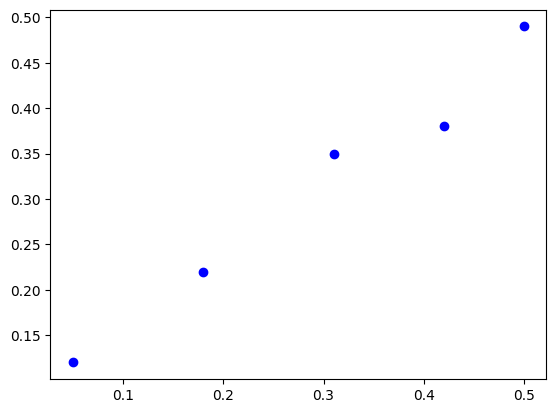

In [ ]:
x = np.array([0.05, 0.18, 0.31, 0.42, 0.50])
y = np.array([0.12, 0.22, 0.35, 0.38, 0.49])

import matplotlib.pyplot as plt
plt.scatter(x, y, color="b");   # plot the dataset

We wish to model this problem where the values of $y$ are being generated by a linear process based on values $X$.

In matrix form, the model is written as

$$y = X \beta + \epsilon$$

and we wish to find some $\hat{\beta}$ that 

$$y \approx X \hat{\beta}$$

given some criteria for approximation. 

Usually it is chosen to minimize the square of the errors $\sum_i (y_i - x_i \hat{\beta})^2$

The expression to solve with these constraints is:

$$\hat{\beta} = (X^T X)^{-1} X^T y$$

So for a given new $x^*$, we compute $y^* = X \hat{\beta}$

Using array programming computing these expressions is hugely simplified:

In [ ]:
from numpy.linalg import inv

X = np.vstack([x, np.ones(len(x))]).T # add column of 1s for intercept != 0

bhat = inv(X.T @ X) @ X.T @ y         # linear least squares
yhat = x * bhat[0] + bhat[1]          # predict y from known values of X using coefficients bhat

Let's plot the result:

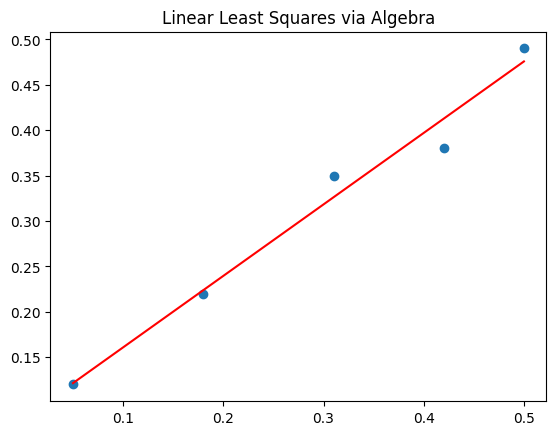

In [ ]:
plt.title("Linear Least Squares via Algebra")
plt.scatter(x, y)
plt.plot(x, yhat, color='red')
plt.show()

### Example: Positive semi-definite matrix

A [positive semi-definite matrix](https://en.wikipedia.org/wiki/Definite_symmetric_matrix) (psd) is the analogue of a non-negative number.

With a psd $n\times n$ matrix $M$ we guarantee that, for each non-null vector with compatible dimension, $v^T M v \geq 0$

There is more than one way to check this property, but the algorithms are slow. If $M$ is very big, we can use a faster random algorithm to check for counter-examples (the answer however will not be certain, only probabilistic).

In [ ]:
M = np.array([[-1,8,3,3],[5,1,4,-1],[9,2,4,7],[8,4,2,-6]])   # is M psd?
print(M)

[[-1  8  3  3]
 [ 5  1  4 -1]
 [ 9  2  4  7]
 [ 8  4  2 -6]]


In [ ]:
nTries = 1000
n = np.shape(M)[0] # number of rows

for _ in range(nTries):
  v = np.random.rand(n,1)-0.5  # create compatible random vector...
  val = v.T @ M @ v            # and check if condition is still true
  if val < 0:
    break                      # counter example found

if val>=0:
  print("M is psd")
else:
  print("M is not psd")

M is not psd


### Example: Buy Low, Sell High

[ref](https://realpython.com/numpy-array-programming/)  

> Given a stock’s price history as a sequence, and assuming that you are only allowed to make one purchase and one sale, what is the maximum profit that can be obtained? For example, given prices = (20, 18, 14, 17, 20, 21, 15), the max profit would be 7, from buying at 14 and selling at 21.

A typical $\mathcal{O}(n)$ solution that iterates *once* through the list finding the difference between each price and a running minimum:

In [ ]:
def profit(prices):
  max_px = 0
  min_px = prices[0]
  for px in prices[1:]:
    min_px = min(min_px, px)
    max_px = max(px - min_px, max_px)
  return max_px

prices = (20, 18, 14, 17, 20, 21, 15)
profit(prices)

7

The `numpy` version uses a vectorized function to accumulate the minimum (check [available](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs) `numpy` functions)

In [ ]:
print(np.minimum.accumulate(prices))  # accumulate running minimum

[20 18 14 14 14 14 14]


The solution becomes:

In [ ]:
def profit_vectorized(prices):
  """Price minus cumulative minimum price, element-wise."""
  prices = np.asarray(prices)
  return np.max(prices - np.minimum.accumulate(prices))

profit_vectorized(prices)

7

Let's check both solution's performance:

In [ ]:
from timeit import timeit

seq = np.random.randint(0, 100, size=10000)

setup = ('from __main__ import profit_vectorized, profit, seq; import numpy as np')
num   = 250

pytime = timeit('profit(seq)',            setup=setup, number=num)
nptime = timeit('profit_vectorized(seq)', setup=setup, number=num)
print('Speed difference: {:0.1f}x'.format(pytime / nptime))

Speed difference: 92.6x




---



### Example: Bayes Theorem

Consider the following problem:

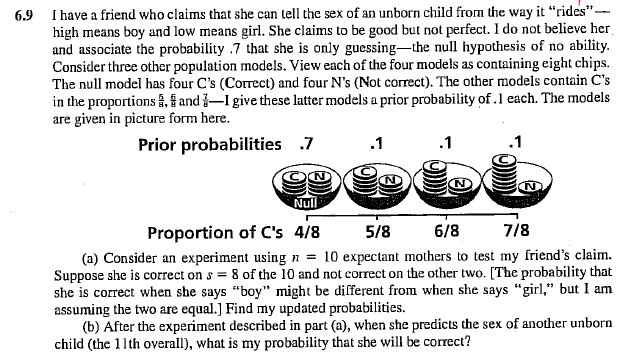

Answer a)

The model $H_i : \{ \text{percentage of correct guesses} = \theta_i\}$ 

The $\theta_i$ values stated in the problem for the four models are

In [ ]:
thetas = np.array([4,5,6,7]) / 8
thetas

array([0.5  , 0.625, 0.75 , 0.875])

The prior distributions for the models are:




In [ ]:
priors = np.array([.7,.1,.1,.1])

The likelihood of model $H_i$ is

$$p(C=c,N=n|H_i) = {n \choose c} ~ \theta_i^c ~ (1-\theta_i)^{n-c}$$

In [ ]:
from scipy.special import comb

def likelihood(theta, c, n):
  return comb(n,c) * theta**c * (1-theta)**(n-c)

The mentioned experiment is $D : \{ C=8, N=10 \}$.

So we can compute the likelihoods:

In [ ]:
likelihoods = likelihood(thetas, 8, 10)  
print(likelihoods)

[0.04394531 0.14733814 0.28156757 0.24160002]


Using Bayes Theorem

$$p(H_i|D)=\frac{p(D|H_i) \times p(H_i)}{p(D)}=\frac{p(D|H_i) \times p(H_i)}{\sum_k p(D|H_k)p(H_k)}$$

We can compute this expression using the vectorized arithmetic operations, without any loops,

In [ ]:
evidence = sum(priors * likelihoods)  # p(D)

posteriors = (likelihoods * priors) / evidence

The answer for the model's posteriors are:

In [ ]:
print(posteriors)

[0.31449747 0.15063356 0.28786522 0.24700374]


Since we are here, let's answer question b)

By the Law of total probability:

$$p(\text{correct|D}) = \sum_i p(\text{correct}, H_i|D) = \sum_i p(\text{correct} | H_i)p(H_i|D) = \sum_i p(C=1,N=1|H_i)p(H_i|D)$$

In [ ]:
sum(likelihood(thetas, 1, 1) * posteriors)

0.683421903548073

We can compare $p(\text{correct})$ previous to the experiment:


In [ ]:
sum(likelihood(thetas, 1, 1) * priors)

0.575